In [208]:
import numpy as np
import xarray as xr
import pygmt

from pathlib import Path

from fdr_test import fdr_test

In [277]:
def colourbar_scale(da):
    abs_max = np.abs(da).max()
    return np.around(abs_max, 3) * 1.2

In [271]:
scale

0.0

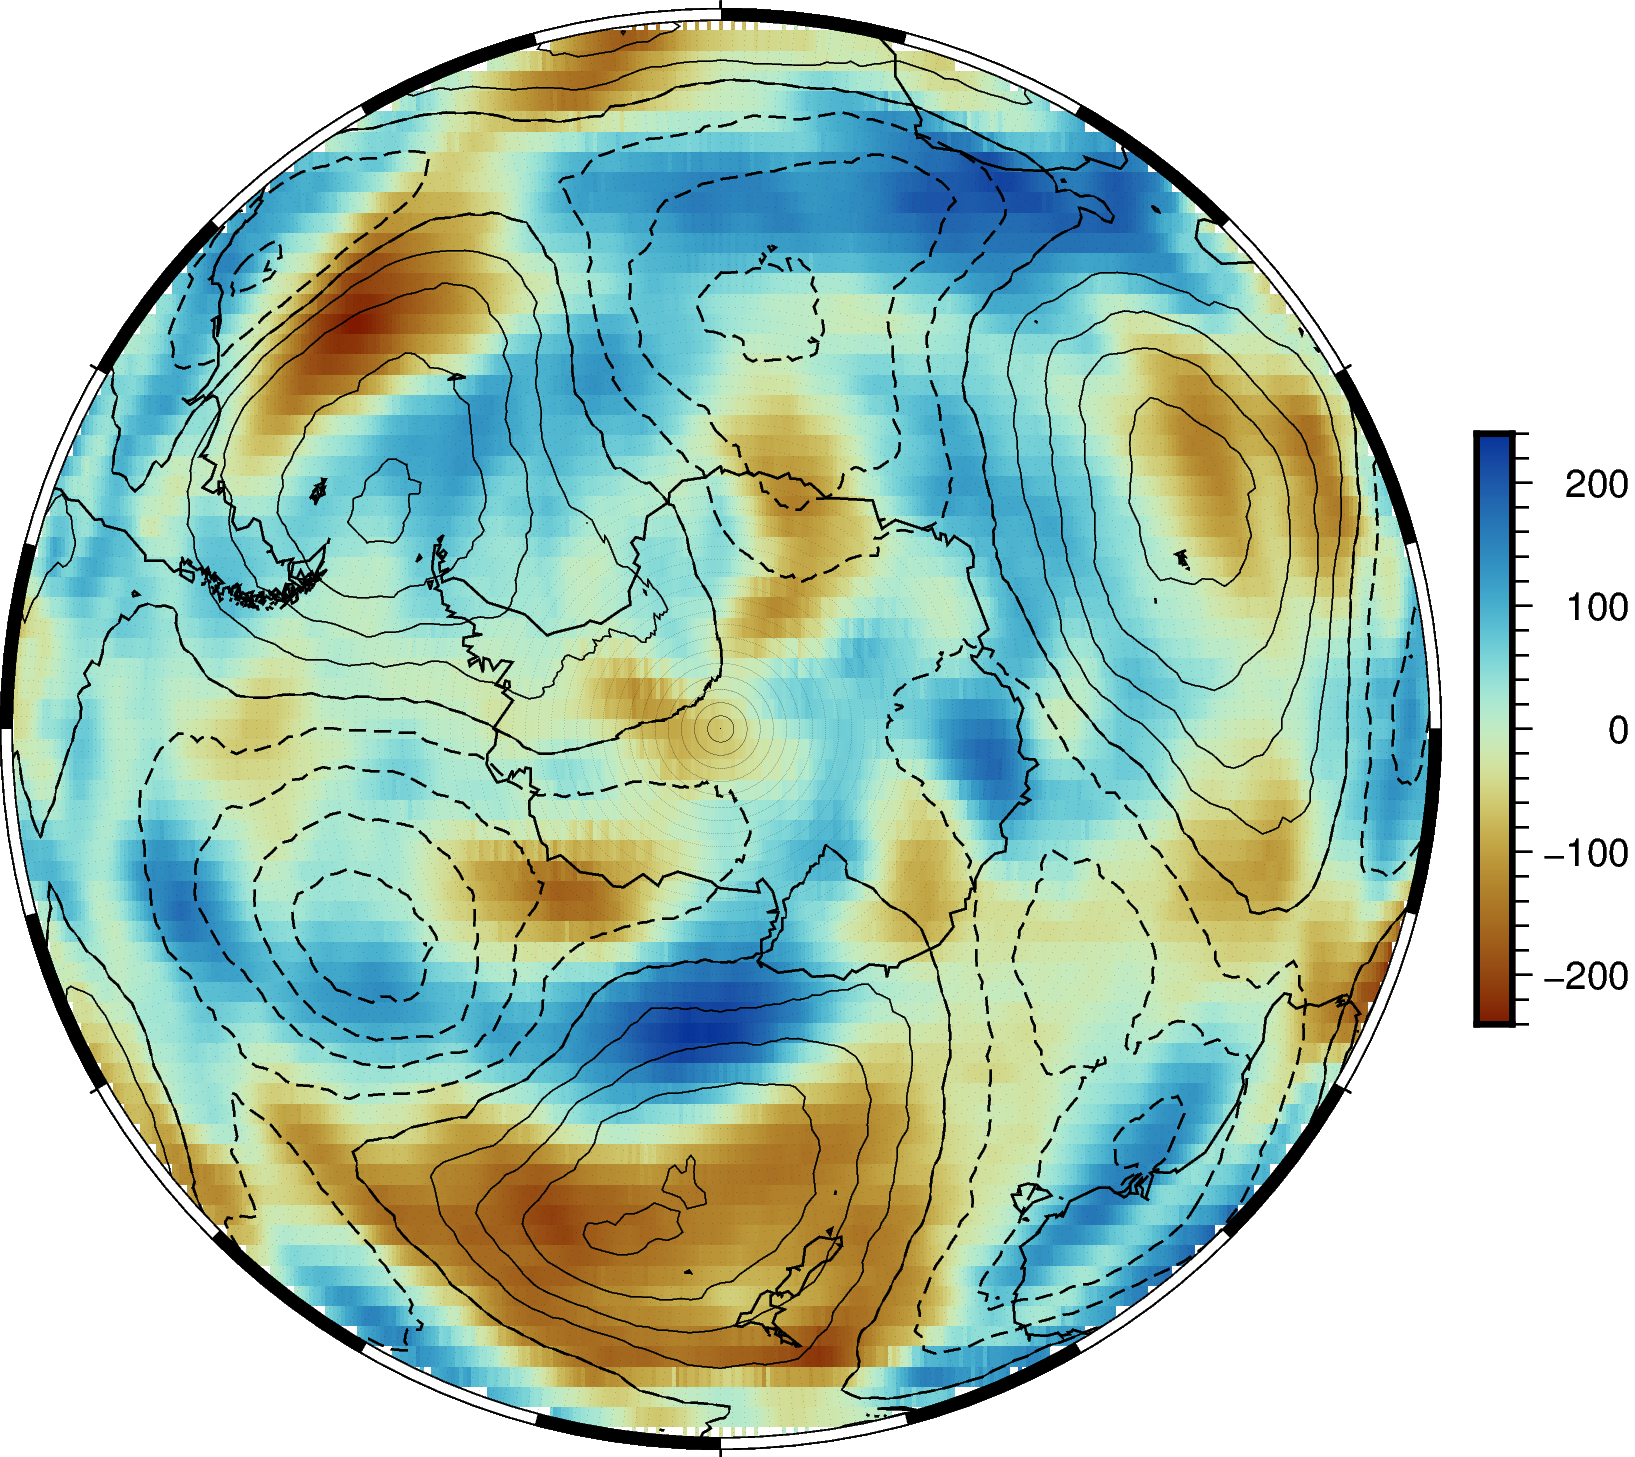

In [224]:
fig = pygmt.Figure()
pygmt.config(MAP_FRAME_TYPE="fancy+")
fig.basemap(region="g", projection="G0/-90/70/12c", frame="a")

fig.grdimage(
    grid=ds_var['cov'],
    cmap="roma",
    projection="G0/-90/70/12c",
    frame=('f'),
)
fig.grdcontour(
    grid=ds_mean['cov'],
    limit=[-scale * 1.2, 0],
    pen="0.5p,black,-",
    interval=60,
    #annotation='10'
)
fig.grdcontour(
    grid=ds_mean['cov'],
    limit=[0, scale * 1.2],
    interval=60,
    #annotation='10'
)
fig.plot(
    x=significant.lon,
    y=significant.lat,
    size=0.02 * (significant.significant),
    style="cc",
    color="black",
    transparency=50
)

fig.colorbar(
    cmap="roma",
    position="JMR+o0.4c/0c+w5c/0.3c",
    frame=["x+l "],
    scale=scale,
    )
fig.coast(shorelines="1/0.5p", resolution="c")

fig.show()

In [240]:
def open_cov_datasets(season=None):
    path = Path("C:\\Users\\User\\Documents\\msc-research\\papers\\paper1\\figures\\data\\cov\\")

    if season == None:
        mean_fname = "mean_sam_rank_cov.nc"
        var_fname = "variance_sam_rank_cov.nc"
        var_corr_fname = "variance_sam_rank_corr.nc"
    else:
        mean_fname = f"{season}_mean_sam_rank_cov.nc"
        var_fname = f"{season}_variance_sam_rank_cov.nc"
        var_corr_fname = f"{season}_variance_sam_rank_corr.nc"

    ds_mean = xr.open_dataset(path / mean_fname)
    ds_var = xr.open_dataset(path / var_fname) 
    ds_var_corr = xr.open_dataset(path / var_corr_fname)
    ds_fdr = fdr_test(ds_var_corr)

    significant = ds_fdr.significant.astype('float64').to_dataframe().reset_index()
    scale = colourbar_scale(ds_var['cov'])

    return ds_mean, ds_var, significant, scale

In [252]:
def cov_figure(fig, season=None):
    ds_mean, ds_var, significant, scale = open_cov_datasets(season)

    fig.grdimage(
        grid=ds_var['cov'],
        cmap="roma",
        projection="G0/-90/70/12c",
        frame=(f'x+l{season}'),
    )
    fig.grdcontour(
        grid=ds_mean['cov'],
        limit=[-scale * 1.2, 0],
        pen="0.5p,black,-",
        interval=300,
        #annotation='10'
    )
    fig.grdcontour(
        grid=ds_mean['cov'],
        limit=[0, scale * 1.2],
        interval=300,
        #annotation='10'
    )
    fig.plot(
        x=significant.lon,
        y=significant.lat,
        size=0.03 * (significant.significant),
        style="cc",
        color="black",
        transparency=20
    )

    fig.coast(shorelines="1/0.5p", resolution="c")

    return scale

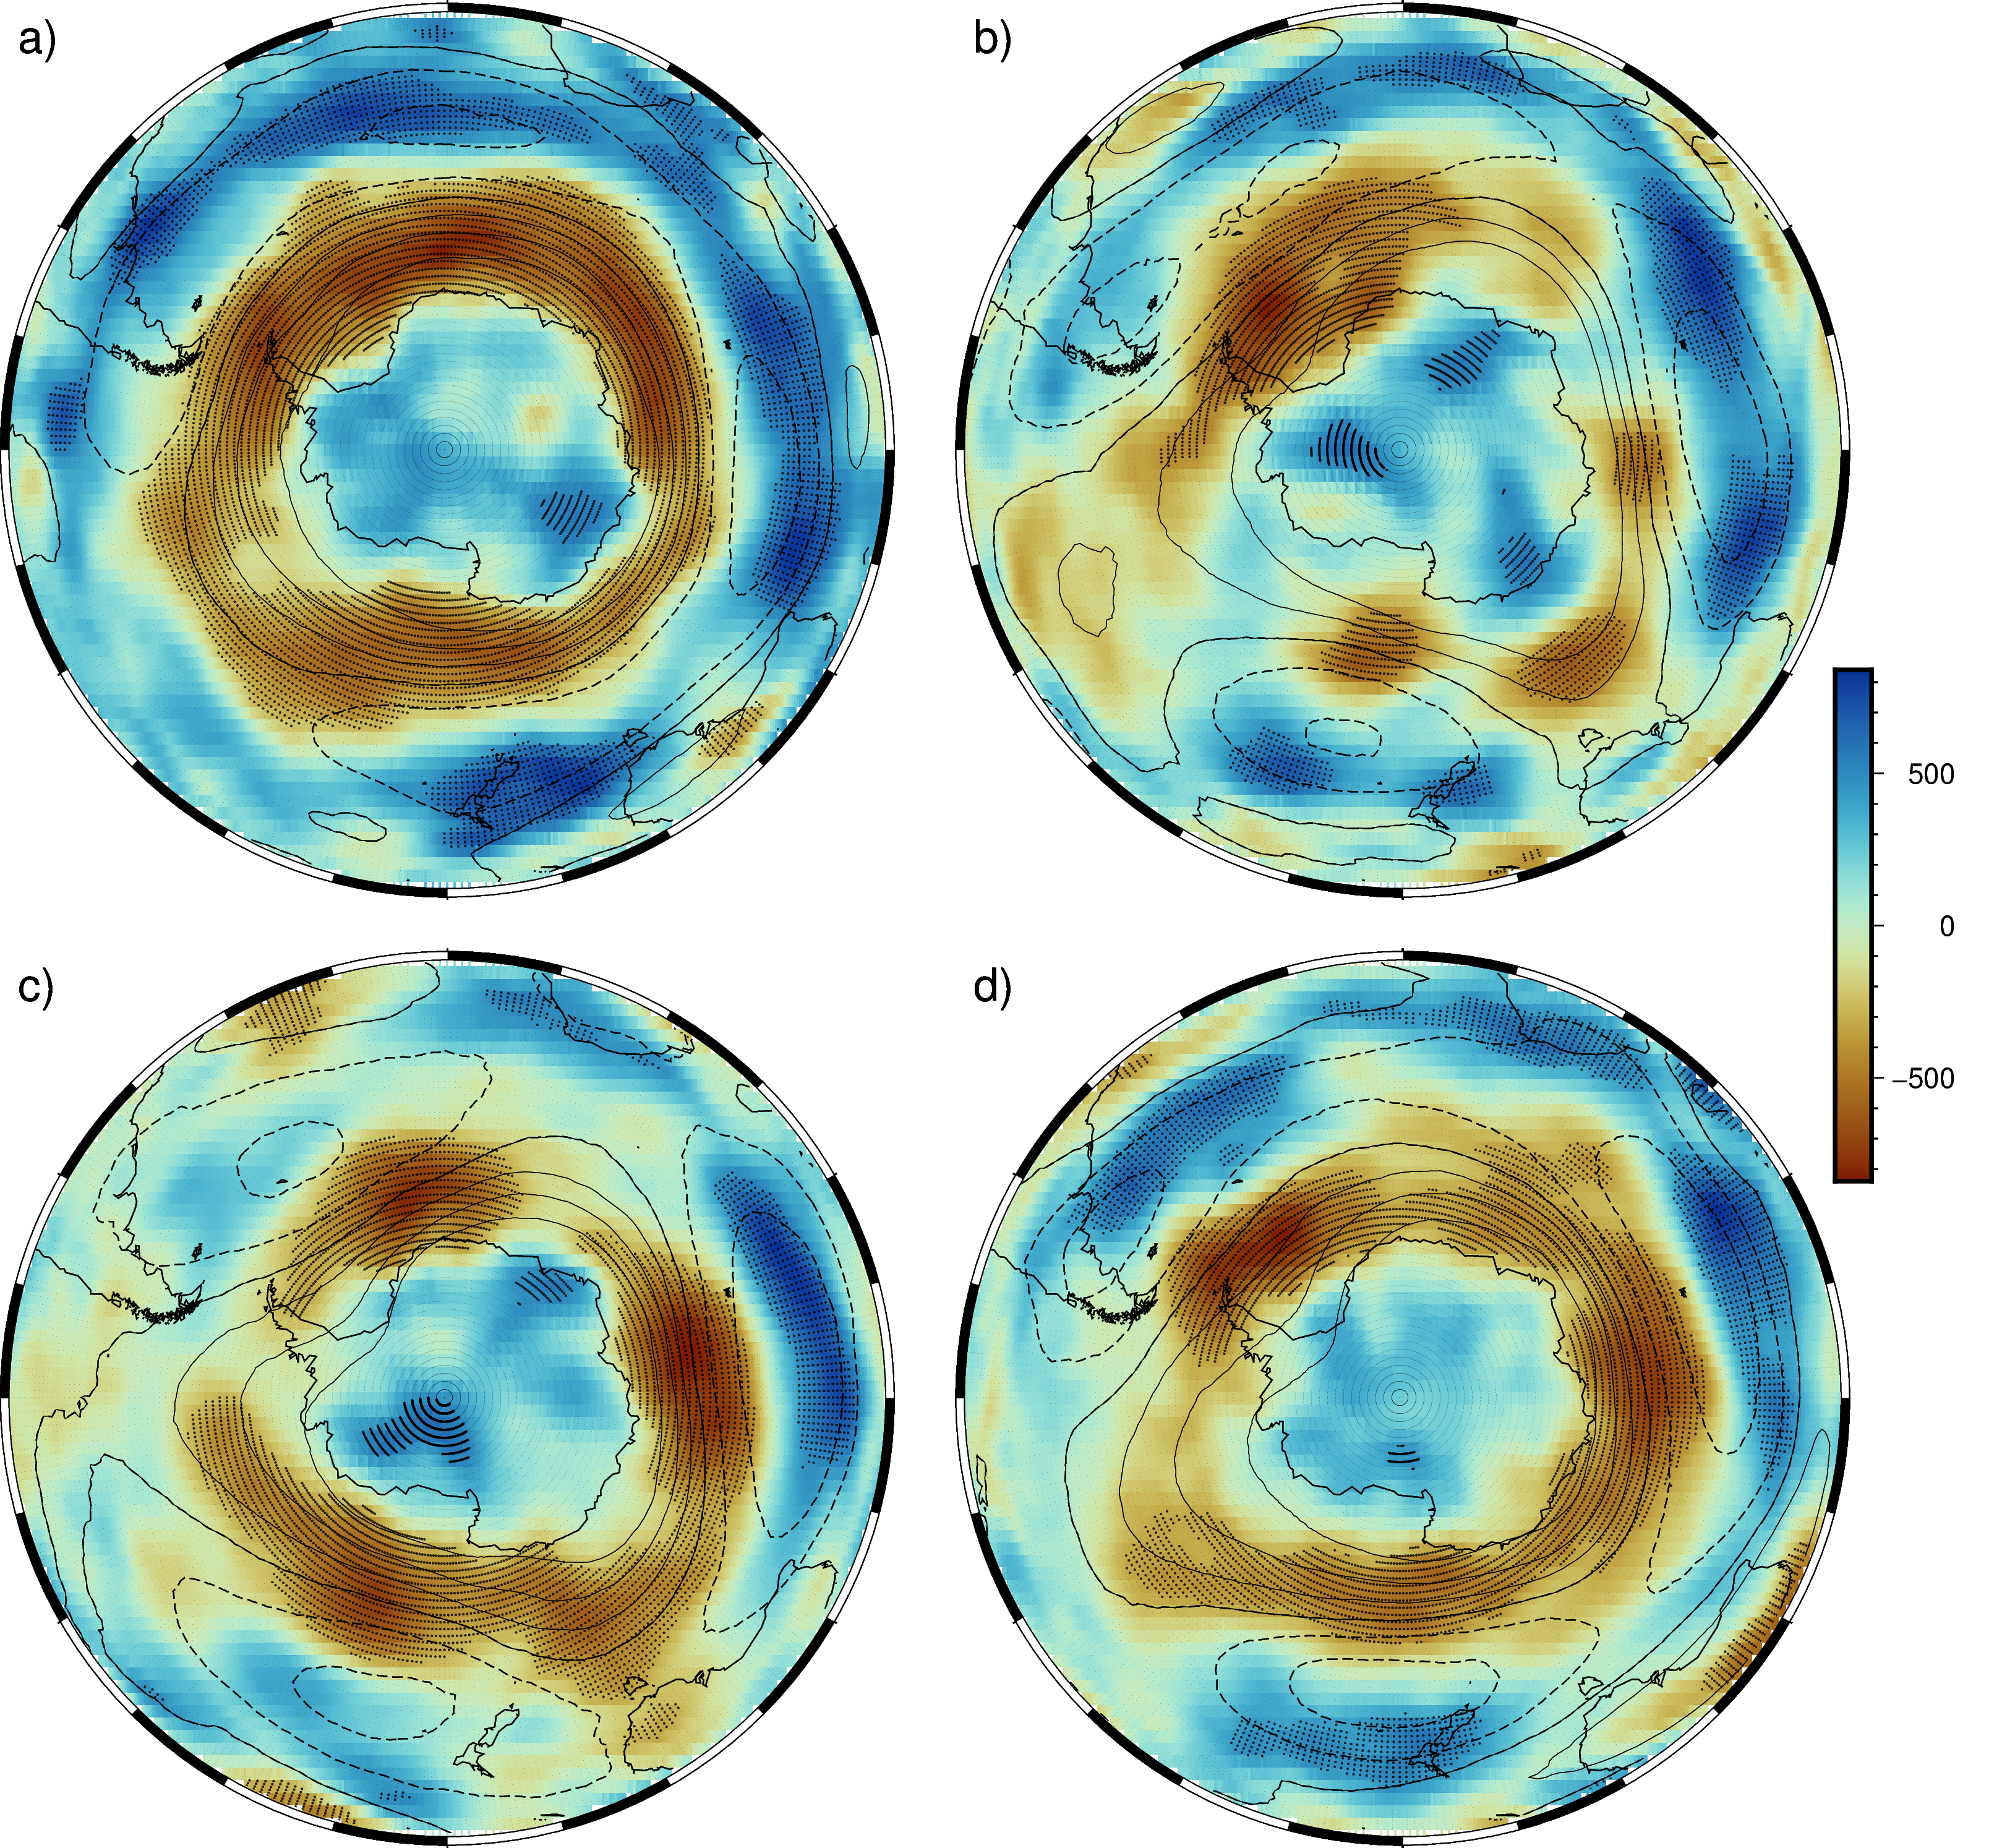

In [253]:
# Create figures for seasonal covariance maps.
seasons = ['DJF', 'MAM', 'JJA', 'SON']
index = 0
scale = 0
fig = pygmt.Figure()
with fig.subplot(
    nrows=2,
    ncols=2,
    figsize=("25c", "25c"),  # width of 15 cm, height of 6 cm
    autolabel=True,
    margins=["0.3c", "0.2c"],  # horizontal 0.3 cm and vertical 0.2 cm margin
    frame="a",
):
    fig.basemap(region="g", projection="G0/-90/70/12c", frame="a", panel=True)
    fig.basemap(region="g", projection="G0/-90/70/12c", frame="a", panel=True)
    fig.basemap(region="g", projection="G0/-90/70/12c", frame="a", panel=True)
    fig.basemap(region="g", projection="G0/-90/70/12c", frame="a", panel=True)

    for season in seasons:
        with fig.set_panel(panel=index):
            tmp_scale = cov_figure(fig, season)
            if tmp_scale > scale:
                scale = tmp_scale
            
        index += 1
    
    fig.colorbar(
        cmap="roma",
        position="JTR+o0c/-3c+w7c/0.5c",
        frame=["x+l "],
        scale=scale,
        )

fig.show()

In [249]:
def open_comp_datasets():
    path = Path("C:\\Users\\User\\Documents\\msc-research\\papers\\paper1\\figures\\data\\composites\\")

    upper_mean_fname = "DJF_mean_SOI_upper_composite.nc"
    lower_mean_fname = "DJF_mean_SOI_lower_composite.nc"
    upper_var_fname = "DJF_variance_SOI_upper_composite.nc"
    lower_var_fname = "DJF_variance_SOI_lower_composite.nc"

    ds_upper_mean = xr.open_dataset(path / upper_mean_fname)
    ds_lower_mean = xr.open_dataset(path / lower_mean_fname)
    ds_upper_var = xr.open_dataset(path / upper_var_fname) 
    ds_lower_var = xr.open_dataset(path / lower_var_fname)
    
    scale = colourbar_scale(ds_upper_var['z'])

    return ds_upper_mean, ds_lower_mean, ds_upper_var, ds_lower_var, scale

In [251]:
def composites(fig, ds_mean, ds_var):

    fig.grdimage(
        grid=ds_var['z'],
        cmap="roma",
        projection="G0/-90/70/12c",
        frame=(f'x+l{season}'),
    )
    fig.grdcontour(
        grid=ds_mean['z'],
        limit=[-scale * 1.2, 0],
        pen="0.5p,black,-",
        interval=100,
        #annotation='10'
    )
    fig.grdcontour(
        grid=ds_mean['z'],
        limit=[0, scale * 1.2],
        interval=100,
        #annotation='10'
    )

    fig.coast(shorelines="1/0.5p", resolution="c")

    return scale

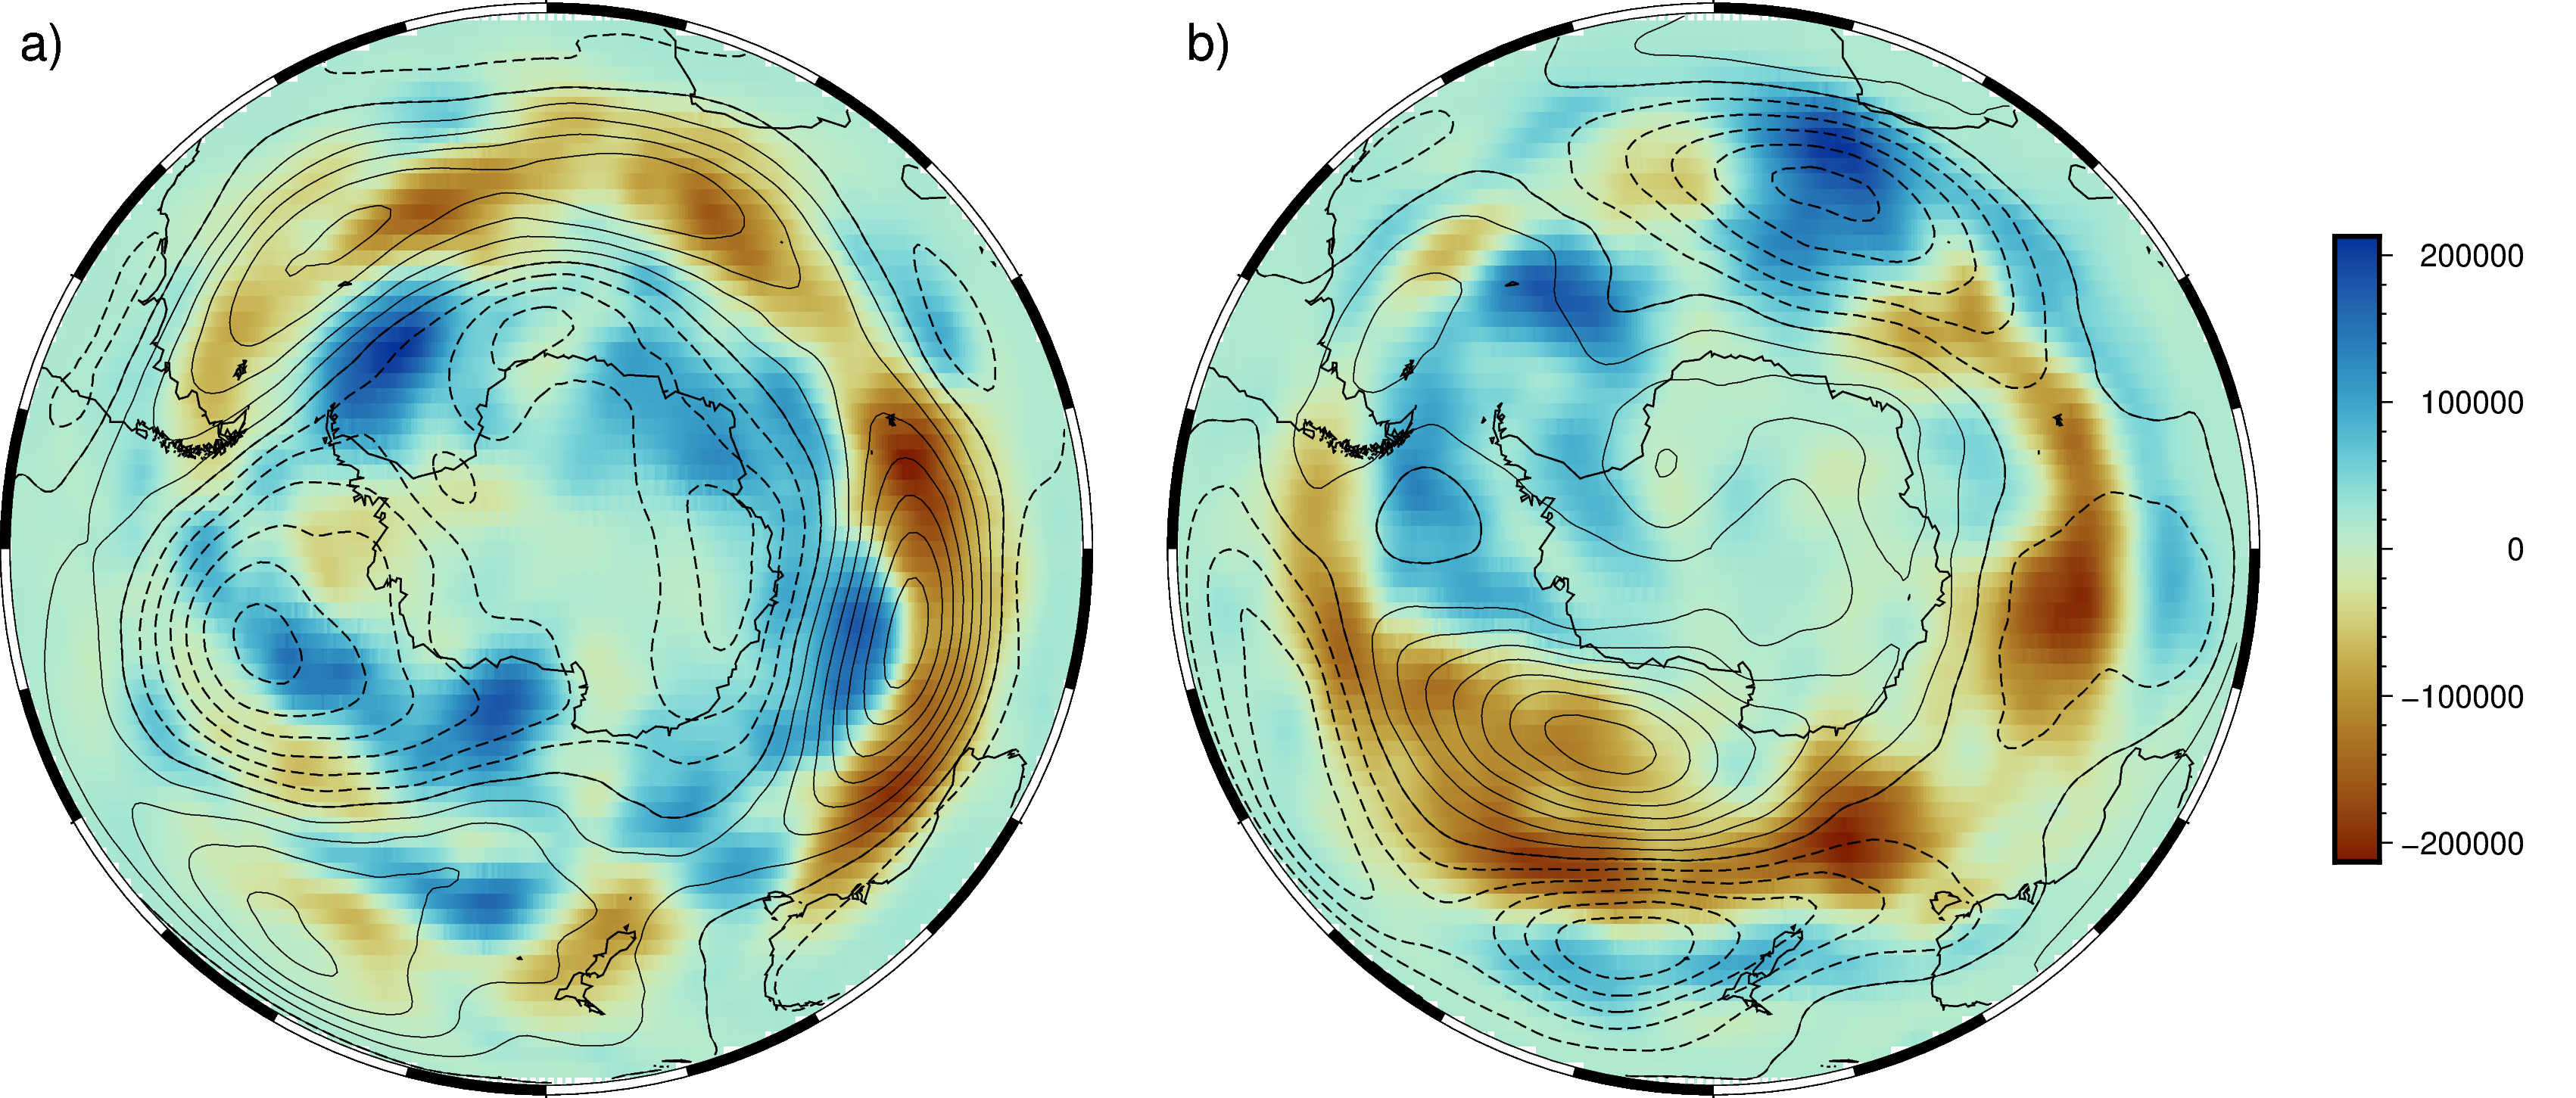

In [256]:
# Create figures for composite maps.
index = 0
scale = 0
fig = pygmt.Figure()
ds_upper_mean, ds_lower_mean, ds_upper_var, ds_lower_var, scale = open_comp_datasets()

comps = [(ds_upper_mean, ds_upper_var), (ds_lower_mean, ds_lower_var)]

with fig.subplot(
    nrows=1,
    ncols=2,
    figsize=("25c", "12c"),
    autolabel=True,
    margins=["0.3c", "0.2c"],  # horizontal 0.3 cm and vertical 0.2 cm margin
    frame="a",
):
    fig.basemap(region="g", projection="G0/-90/70/12c", frame="a", panel=True)
    fig.basemap(region="g", projection="G0/-90/70/12c", frame="a", panel=True)

    for comp in comps:
        with fig.set_panel(panel=index):
            composites(fig, comp[0], comp[1])
        index += 1
    
    fig.colorbar(
        cmap="roma",
        position="JMR+o1c/0c+w7c/0.5c",
        frame=["x+l "],
        scale=scale,
        )

fig.show()

In [269]:
def open_mca_datasets(season, mode=1, timescale="daily"):
    path = Path("C:\\Users\\User\\Documents\\msc-research\\papers\\paper1\\figures\\data\\mca\\")

    if timescale == "daily":
        path = path / "daily"
        fname = f"mca_15_day_window_{season}_mode{mode}.nc"
    else:
        path = path / "monthly"
    fname = f"mca_monthly_{season}_mode{mode}.nc"
    

    ds = xr.open_dataset(path / fname)
    var_da = ds['var']
    mean_da = ds['mean']
    print(var_da.max())
    scale = colourbar_scale(var_da)

    return mean_da, var_da, scale

In [284]:
def mca_figures(fig, mean_da, var_da, scale):

    fig.grdimage(
        grid=var_da,
        cmap="roma",
        projection="G0/-90/70/12c",
        frame=('f'),
    )
    fig.grdcontour(
        grid=mean_da,
        limit=[-scale * 1.2, 0],
        pen="0.5p,black,-",
        interval=0.05,
        #annotation='10'
    )
    fig.grdcontour(
        grid=mean_da,
        limit=[0, scale * 1.2],
        interval=0.05,
        #annotation='10'
    )

    fig.coast(shorelines="1/0.5p", resolution="c")

In [285]:
# Create figures for SOI MCA modes.
modes = [("JJA", 1), ("JJA", 3), ("MAM", 2), ("MAM", 3)]
index = 0
scale = 0
fig = pygmt.Figure()
with fig.subplot(
    nrows=2,
    ncols=2,
    figsize=("25c", "25c"),
    autolabel=True,
    margins=["0.3c", "0.2c"],  # horizontal 0.3 cm and vertical 0.2 cm margin
    frame="a",
):
    fig.basemap(region="g", projection="G0/-90/70/12c", frame="a", panel=True)
    fig.basemap(region="g", projection="G0/-90/70/12c", frame="a", panel=True)
    fig.basemap(region="g", projection="G0/-90/70/12c", frame="a", panel=True)
    fig.basemap(region="g", projection="G0/-90/70/12c", frame="a", panel=True)

    for mode in modes:
        with fig.set_panel(panel=index):
            mean_da, var_da, scale = open_mca_datasets(mode[0], mode[1], "monthly")
            mca_figures(fig, mean_da, var_da, scale)
            if tmp_scale > scale:
                scale = tmp_scale
        index += 1
    print(scale, tmp_scale)
    fig.colorbar(
        cmap="roma",
        position="JTR+o0c/-3c+w7c/0.5c",
        frame=["x+l "],
        scale=scale,
        )

fig.show()

<xarray.DataArray 'var' ()>
array(0.0190821)
Coordinates:
    mode     int32 ...


ValueError: Cannot convert a NumPy datetime value other than NaT with generic units

In [281]:
mean_da, var_da, scale = open_mca_datasets("JJA", 1, "monthly")

<xarray.DataArray 'var' ()>
array(0.0190821)
Coordinates:
    mode     int32 ...


In [293]:
fig = pygmt.Figure()
fig.basemap(region="g", projection="G0/-90/70/12c", frame="a")
fig.grdimage(
        grid=var_da,
        cmap="roma",
        projection="G0/-90/70/12c",
        frame=('f'),
    )
fig.grdcontour(
    grid=mean_da,
    limit=[-scale * 1.2, 0],
    pen="0.5p,black,-",
    interval=0.05,
    #annotation='10'
)
# fig.grdcontour(
#     grid=mean_da,
#     limit=[0, scale * 1.2],
#     interval=0.05,
#     #annotation='10'
# )

ValueError: Cannot convert a NumPy datetime value other than NaT with generic units

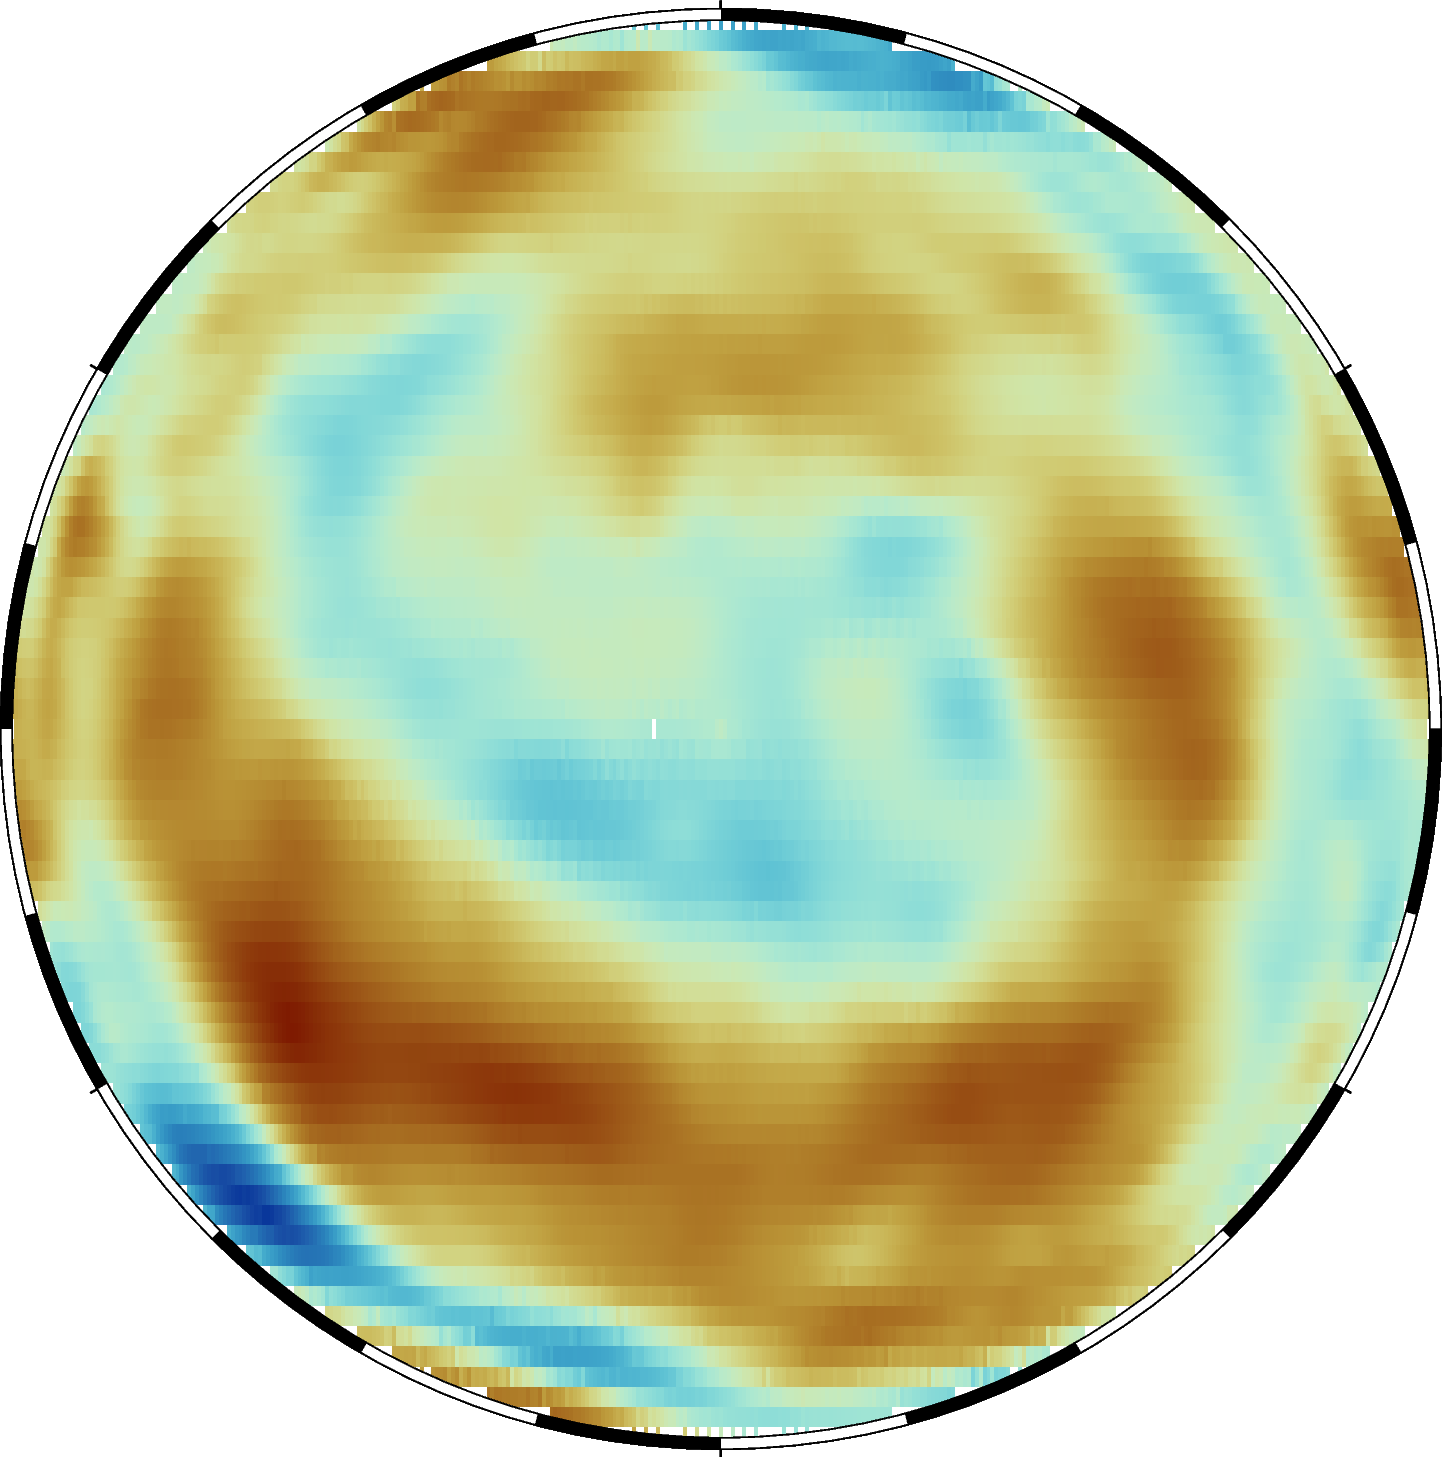

In [290]:
fig.show()